In [2]:
import matplotlib
import importlib
import ventos.signal as signal
import ventos.sim.simple as simple
import pandas as pd, matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10,7]
pd.set_option('precision', 4)



In [40]:
def vent_plots(pdf, title):
    fig, plots = plt.subplots(3, sharex=True) # , gridspec_kw={'hspace': 0}
    (ax1, ax2, ax3) = plots
    for ax in plots:
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plots[-1].spines['bottom'].set_visible(True)
        
    fig.suptitle(title)
    ax1.plot(pdf['time'] / 1000, pdf['flow'], 'dimgray')
    ax1.plot(pdf['time'] / 1000, pdf['flow_i'], 'tab:orange')
    ax1.plot(pdf['time'] / 1000, pdf['flow_e'], 'tab:blue')

    ax1.set(ylabel = 'Flow (l/s)')
    ax2.plot(pdf['time'] / 1000, pdf['pressure_mouth'], 'dimgray')
    ax2.plot(pdf['time'] / 1000, pdf['pressure_1'], 'tab:green')
    ax2.plot(pdf['time'] / 1000, pdf['pressure_2'], 'tab:green')

    ax2.set(ylabel = 'P (cmH2O)')
    ax3.plot(pdf['time'] / 1000, pdf['lung_volume'], 'tab:orange')
    ax3.set(ylabel = 'Volume (ml)', xlabel = 'time (seconds)')
    ax1.label_outer()
    ax2.label_outer()
    plt.show()
    
def processed_plots(df):
    df.plot(x='time_s', y=['p', 'vhigh', 'vlow', 'PIP', 'PEEP', 'RR', 'phase'], # 'Vhigh', 'Vlow', # 'Thigh', 'Tlow', 'Tpeak',
            title = "Smoothing "
             rf"($\alpha_A$={config.alphaA:.4f} $\alpha_R$={config.alphaR:.4f} $\alpha_S$={config.alphaS:.4f} $\alpha_N$={config.alphaN:.4f}"
             f" Hz={config.sample_frequency} noise RMS={scenario['pressure_noise_sd']})"
                      )
    plt.show()

In [15]:
def run_and_output(scenario):
    print(scenario)
    pdf = simple.execute_scenario(scenario)
    vent_plots(pdf, title=scenario['title'])
    return pdf


In [16]:
base_scenario = dict(
    title = 'Base',
    resistance = 20,
    PEEP = 5,
    IE = 0.5,
    Pi = 15,
    rate = 10,
    end_time = 30,
    time_resolution = 50,
    flow_noise_sd = 0.05,
    pressure_noise_sd = 1,
    heart_rate = 85,
    cardiac_amplitude = 0.05,
    events = []
)
e= 30
r= 500
c= 0.1
badness = [
    dict(attr = 'PEEP', val = 10, time=4),
    dict(attr = 'Pi', val = 15, time=6),
    dict(attr = 'Pi', val = 13, time=10),

]

{'title': 'Badness', 'resistance': 20, 'PEEP': 5, 'IE': 0.5, 'Pi': 15, 'rate': 10, 'end_time': 30, 'time_resolution': 500, 'flow_noise_sd': 0.05, 'pressure_noise_sd': 1, 'heart_rate': 60, 'cardiac_amplitude': 0.1, 'events': [{'attr': 'PEEP', 'val': 10, 'time': 4}, {'attr': 'Pi', 'val': 15, 'time': 6}, {'attr': 'Pi', 'val': 13, 'time': 10}]}
Event at 4000ms setting PEEP to 10
Event at 6000ms setting Pi to 15
Event at 10000ms setting Pi to 13


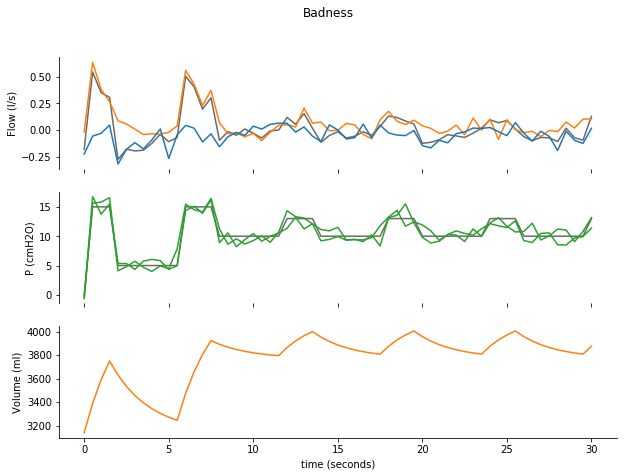

In [17]:
scenarios = [
    dict(base_scenario, title='Badness', 
         cardiac_amplitude = c, end_time = e, heart_rate = 60, time_resolution = r,
         events=badness),
]
held_senarios = [
    base_scenario,
    dict(base_scenario, title='Cardiac 30', cardiac_amplitude = c, end_time = e, heart_rate = 30, time_resolution = r),
    dict(base_scenario, title='Cardiac 120', cardiac_amplitude = c, end_time = e, heart_rate = 120, time_resolution = r),
    dict(base_scenario, title='High Resistance', resistance = 80),
    dict(base_scenario, title='Low Pressure', Pi = 7),
    dict(base_scenario, title='Wimpy', PEEP = 7, Pi=10),
    dict(base_scenario, title='High Pressure', PEEP = 14),
    dict(base_scenario, title='Stuck High', PEEP = 14, Pi = 14),
    dict(base_scenario, title='Crazy fast', rate = 60),   
    dict(base_scenario, title='Too slow', rate = 3),   
    dict(base_scenario, title='No expiration time', rate = 12, IE = 5),   
]
for s in scenarios:
    run_and_output(s)

{'title': 'Base', 'resistance': 20, 'PEEP': 5, 'IE': 0.5, 'Pi': 15, 'rate': 10, 'end_time': 30, 'time_resolution': 50, 'flow_noise_sd': 0.05, 'pressure_noise_sd': 1, 'heart_rate': 85, 'cardiac_amplitude': 0.05, 'events': []}


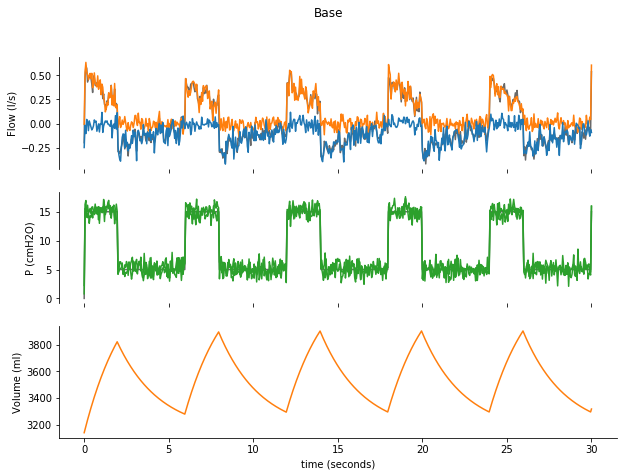

PIRDS!!! [{"event":"M","type":"P","loc":"I","ms":0,"val":1},{"event":"M","type":"P","loc":"E","ms":0,"val":2},{"event":"M","type":"F","loc":"I","ms":0,"val":-449},{"event":"M","type":"F","loc":"E","ms":0,"val":-14858},{"event":"M","type":"P","loc":"I","ms":50,"val":16},{"event":"M","type":"P","loc":"E","ms":50,"val":16},{"event":"M","type":"F","loc":"I","ms":50,"val":31833},{"event":"M","type":"F","loc":"E","ms":50,"val":-1085},{"event":"M","type":"P","loc":"I","ms":100,"val":15},{"event":"M","type":"P","loc":"E","ms":100,"val":17},{"event":"M","type":"F","loc":"I","ms":100,"val":37952},{"event":"M","type":"F","loc":"E","ms":100,"val":-6200},{"event":"M","type":"P","loc":"I","ms":150,"val":15},{"event":"M","type":"P","loc":"E","ms":150,"val":14},{"event":"M","type":"F","loc":"I","ms":150,"val":32058},{"event":"M","type":"F","loc":"E","ms":150,"val":2575},{"event":"M","type":"P","loc":"I","ms":200,"val":16},{"event":"M","type":"P","loc":"E","ms":200,"val":14},{"event":"M","type":"F","lo

In [18]:
### Testing PIRDS function:
pdf = run_and_output(base_scenario)        
print("PIRDS!!!", simple.df_to_PIRDS(pdf.head()).to_json(orient="records"))

In [19]:
#pdf = run_and_output(base_scenario)

In [20]:
#f = pdf.head(5).to_json(orient='records')

{'title': 'Base', 'resistance': 20, 'PEEP': 5, 'IE': 0.5, 'Pi': 20, 'rate': 10, 'end_time': 240, 'time_resolution': 1, 'flow_noise_sd': 0.05, 'pressure_noise_sd': 1, 'heart_rate': 85, 'cardiac_amplitude': 0.05, 'events': [{'attr': 'PEEP', 'val': 10, 'time': 40}, {'attr': 'Pi', 'val': 15, 'time': 46}, {'attr': 'Pi', 'val': 13, 'time': 50}, {'attr': 'PEEP', 'val': 13, 'time': 55}, {'attr': 'PEEP', 'val': 5, 'time': 120}, {'attr': 'Pi', 'val': 20, 'time': 121}]}
Event at 40000ms setting PEEP to 10
Event at 46000ms setting Pi to 15
Event at 50000ms setting Pi to 13
Event at 55000ms setting PEEP to 13
Event at 120000ms setting PEEP to 5
Event at 121000ms setting Pi to 20


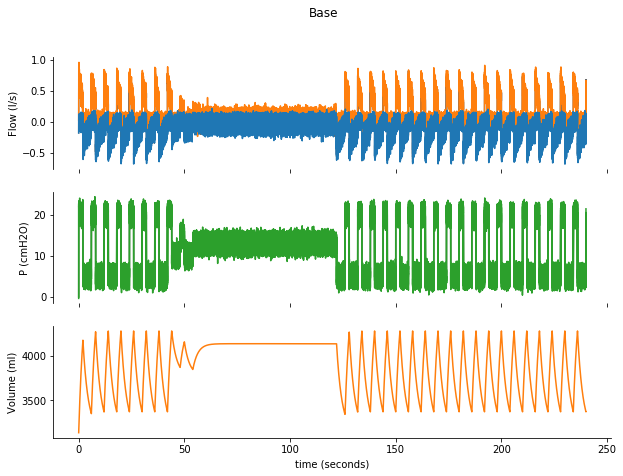

In [29]:
sample_frequency = 1000
start = 40
fix = 120
badness = [
    dict(attr = 'PEEP', val = 10, time=start),
    dict(attr = 'Pi', val = 15, time=start+6),
    dict(attr = 'Pi', val = 13, time=start+10),
    dict(attr = 'PEEP', val = 13, time=start+15),
    dict(attr = 'PEEP', val = 5, time=fix),
    dict(attr = 'Pi', val = 20, time=fix+1),
]
scenario = dict(base_scenario,
                Pi=20, PEEP=5,
                time_resolution = round(1000/sample_frequency), end_time = 240,
                events = badness)
sim = run_and_output(scenario)

In [57]:
len(sim)

240001

Targeting αN=0.05, αA=0.1, αR=0.8, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


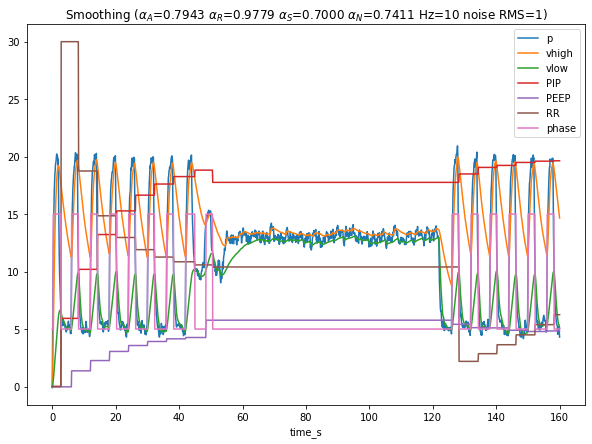

b


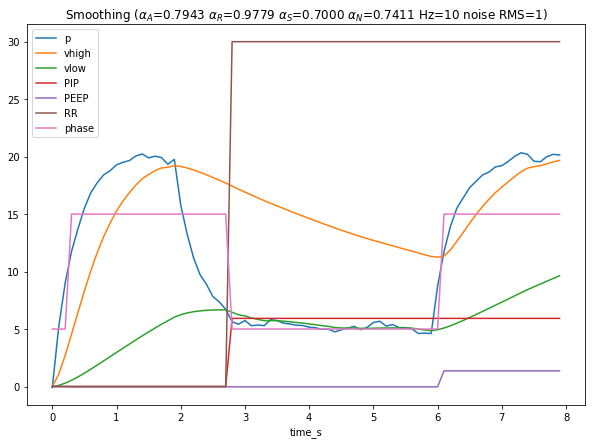

Targeting αN=0.05, αA=0.1, αR=0.9, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


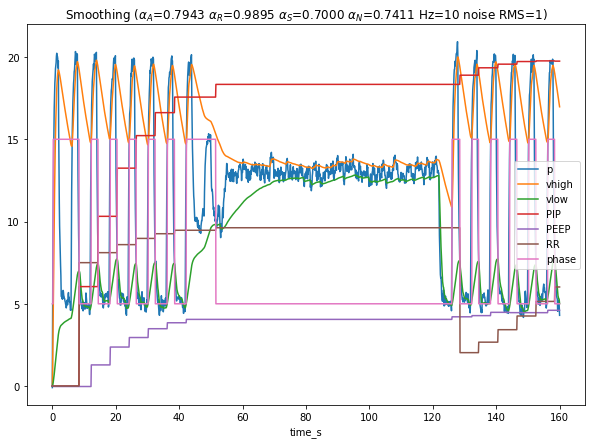

b


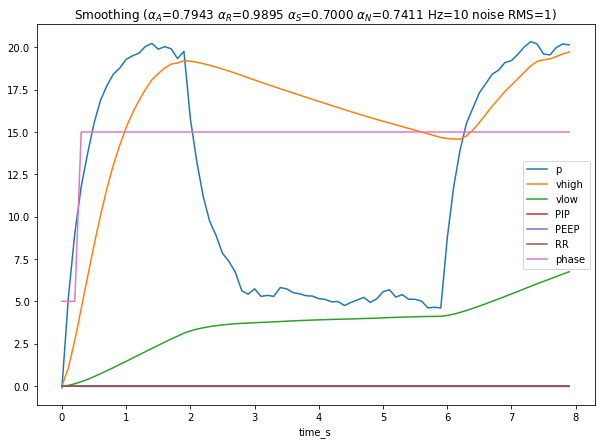

Targeting αN=0.05, αA=0.1, αR=0.97, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


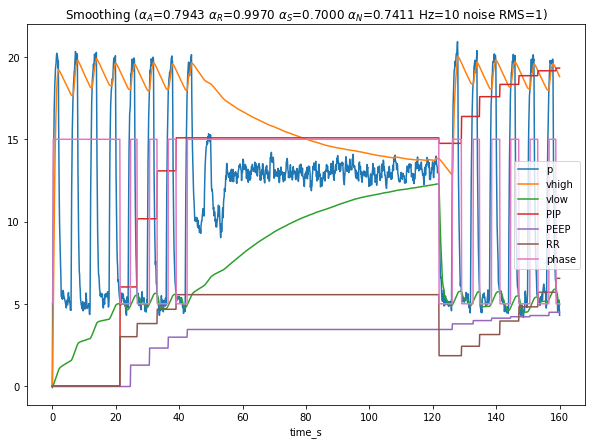

b


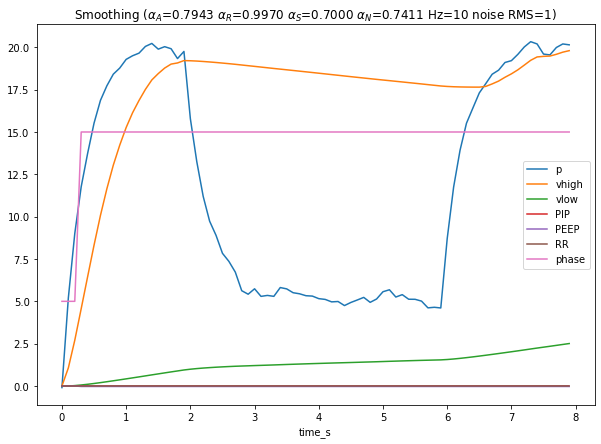

Targeting αN=0.05, αA=0.2, αR=0.8, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


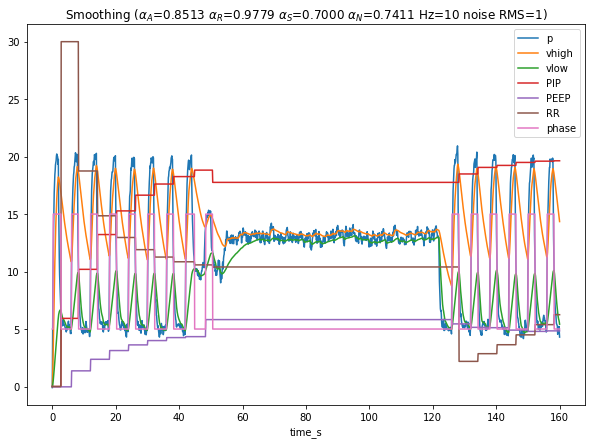

b


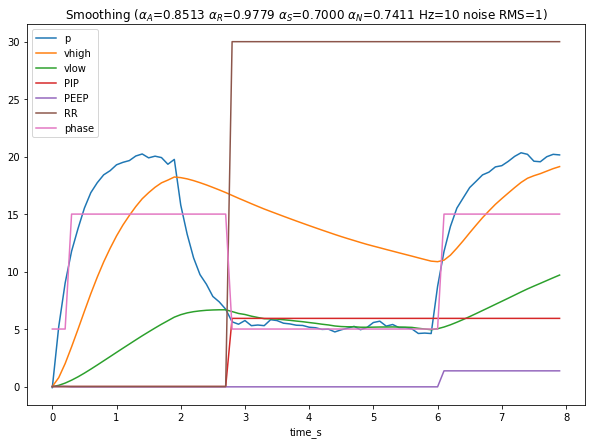

Targeting αN=0.05, αA=0.2, αR=0.9, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


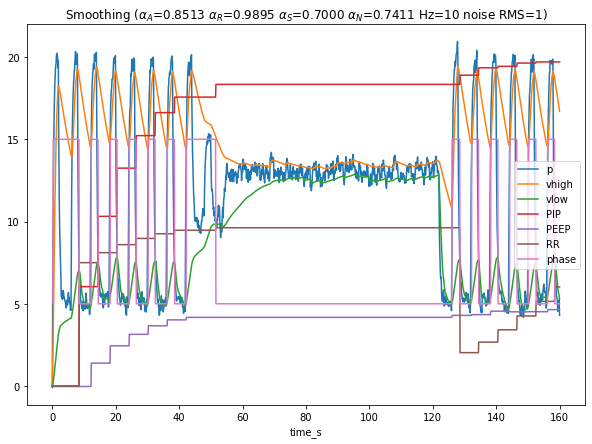

b


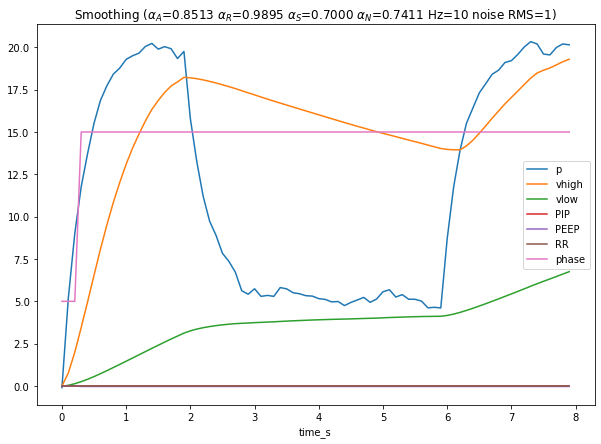

Targeting αN=0.05, αA=0.2, αR=0.97, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


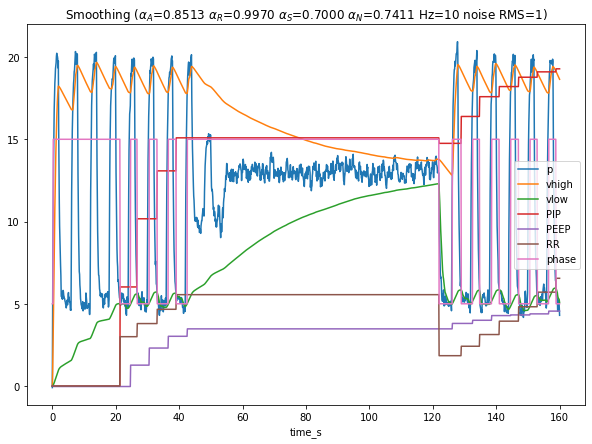

b


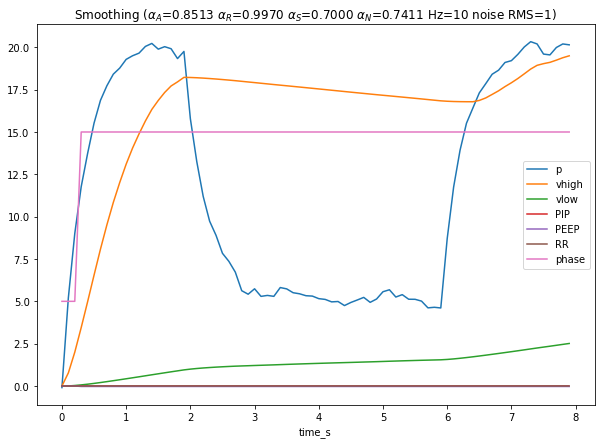

Targeting αN=0.05, αA=0.4, αR=0.8, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


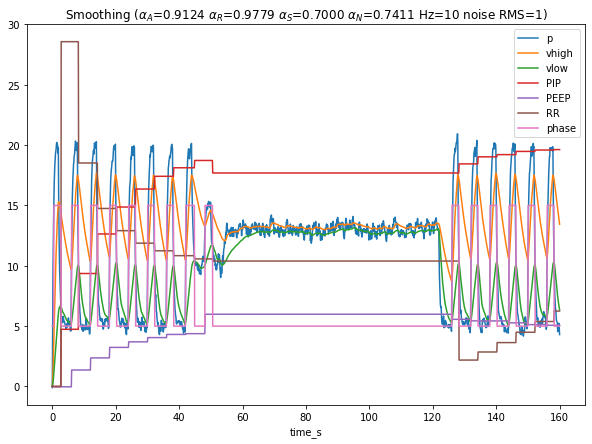

b


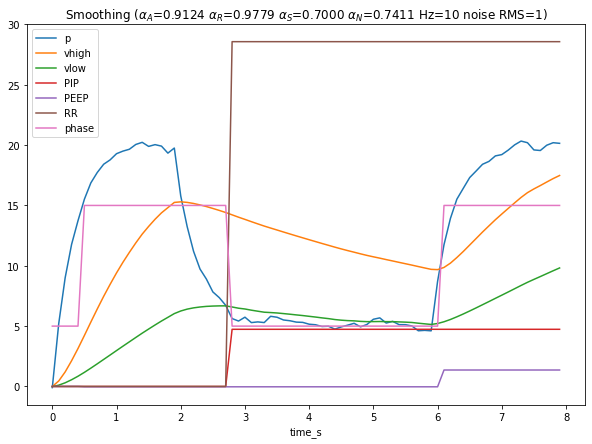

Targeting αN=0.05, αA=0.4, αR=0.9, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


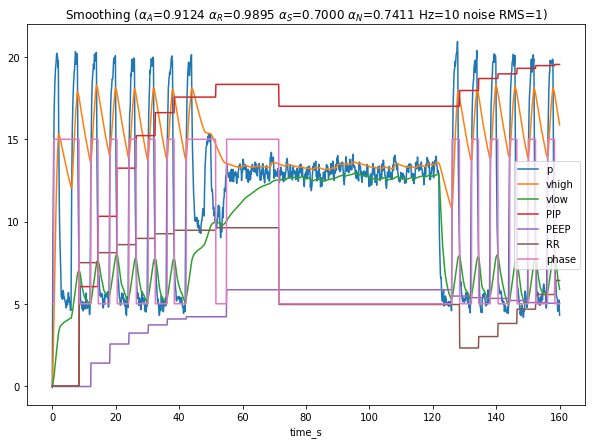

b


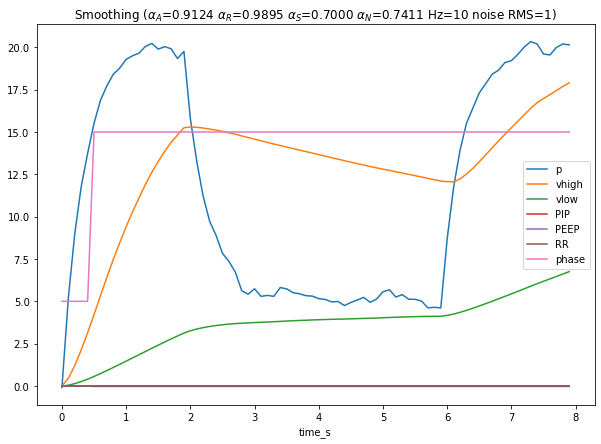

Targeting αN=0.05, αA=0.4, αR=0.97, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


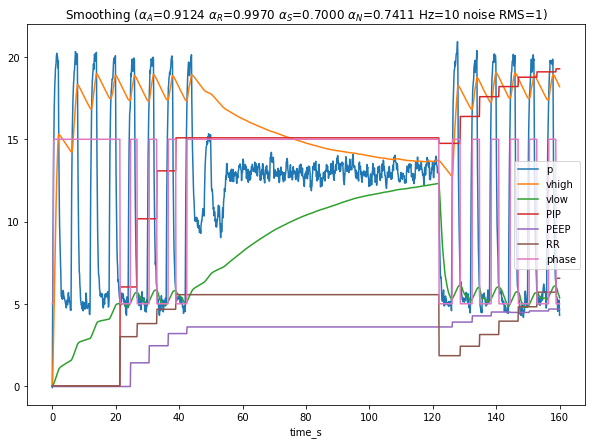

b


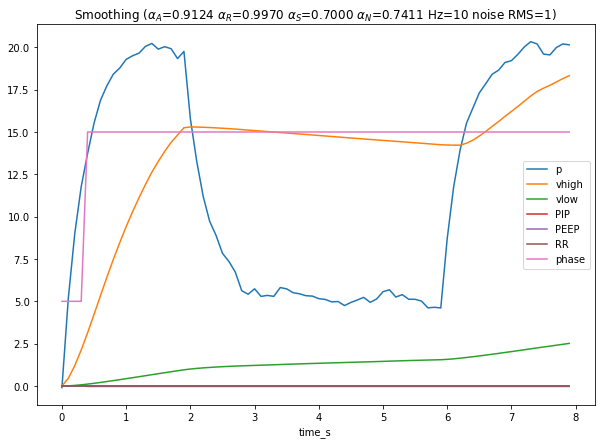

Targeting αN=0.1, αA=0.1, αR=0.8, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


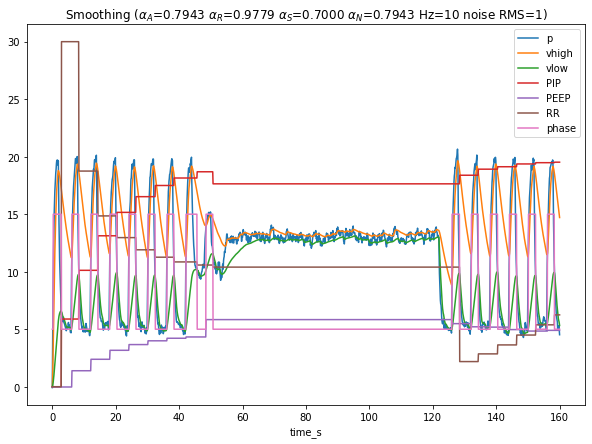

b


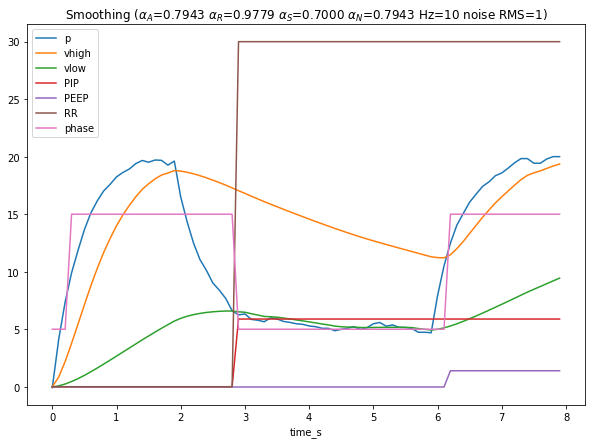

Targeting αN=0.1, αA=0.1, αR=0.9, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


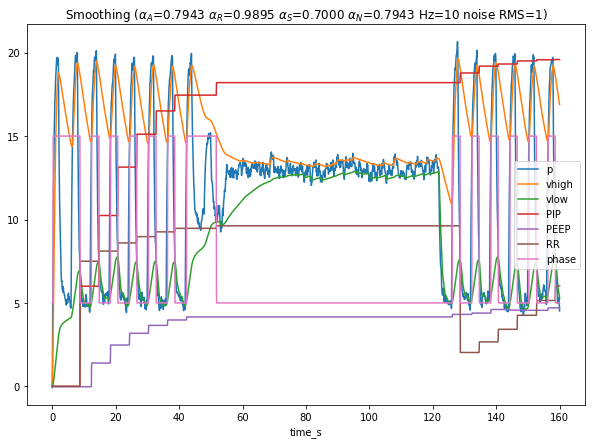

b


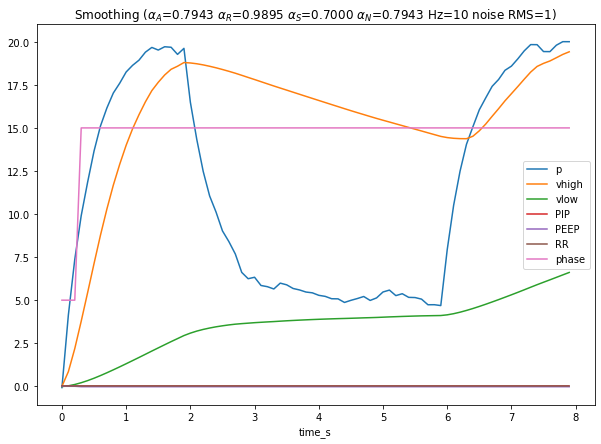

Targeting αN=0.1, αA=0.1, αR=0.97, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


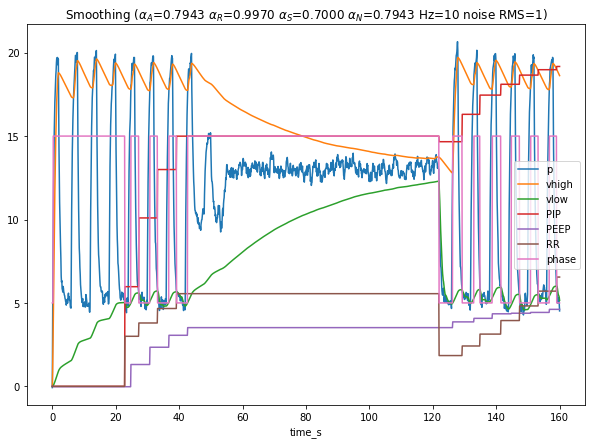

b


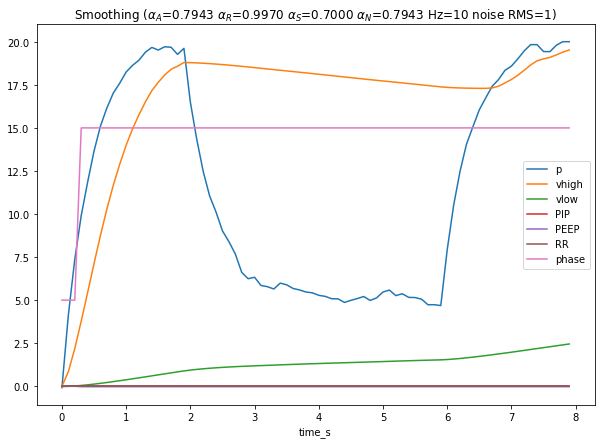

Targeting αN=0.1, αA=0.2, αR=0.8, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


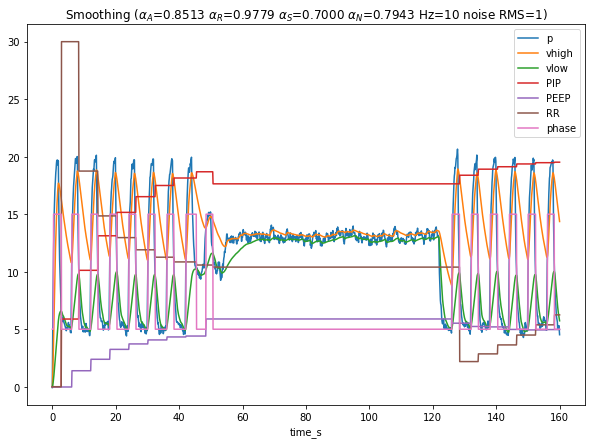

b


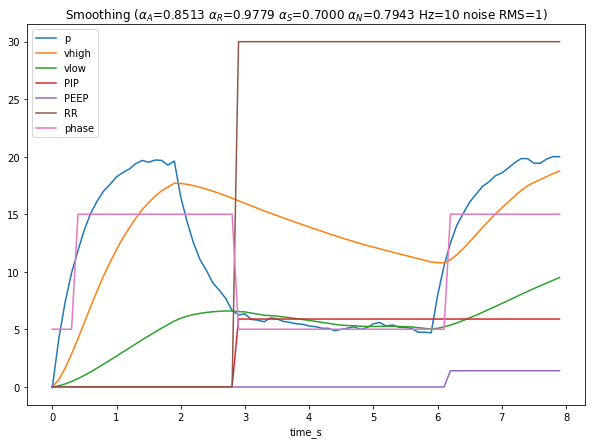

Targeting αN=0.1, αA=0.2, αR=0.9, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


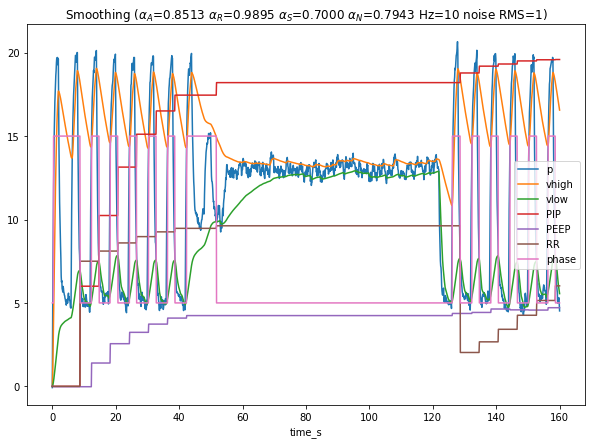

b


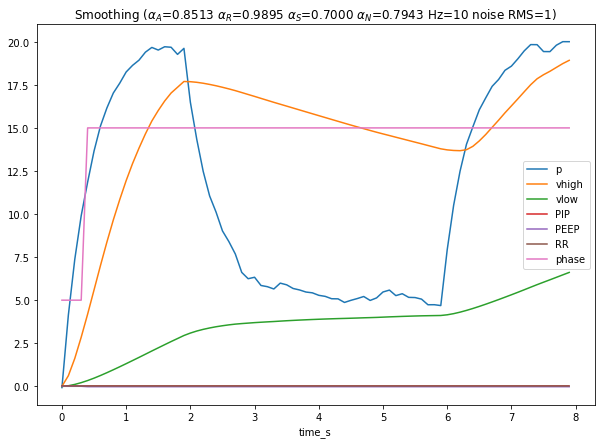

Targeting αN=0.1, αA=0.2, αR=0.97, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


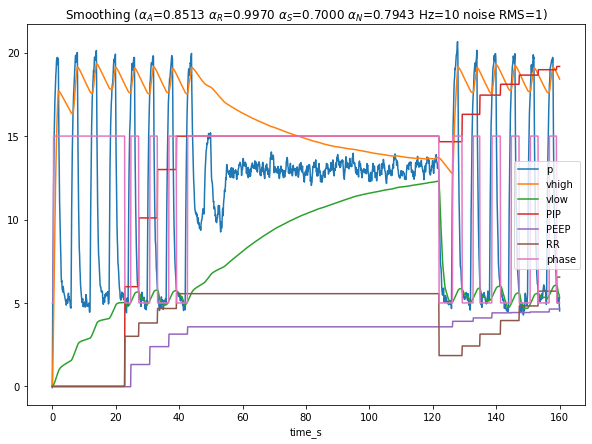

b


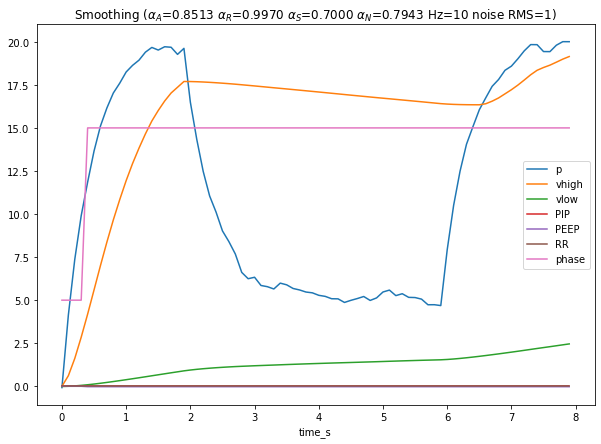

Targeting αN=0.1, αA=0.4, αR=0.8, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


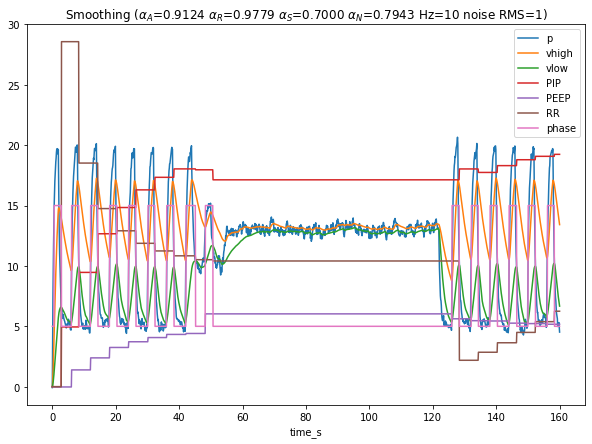

b


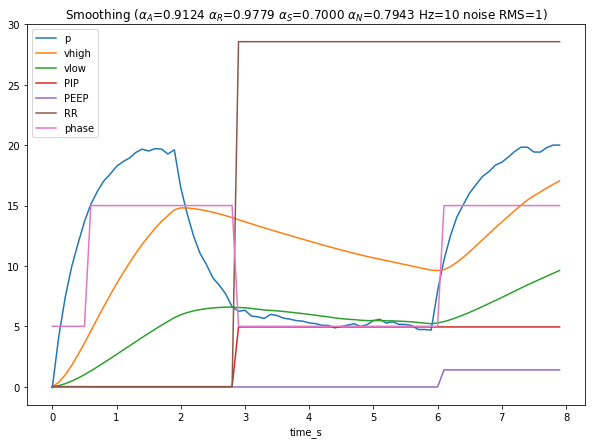

Targeting αN=0.1, αA=0.4, αR=0.9, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


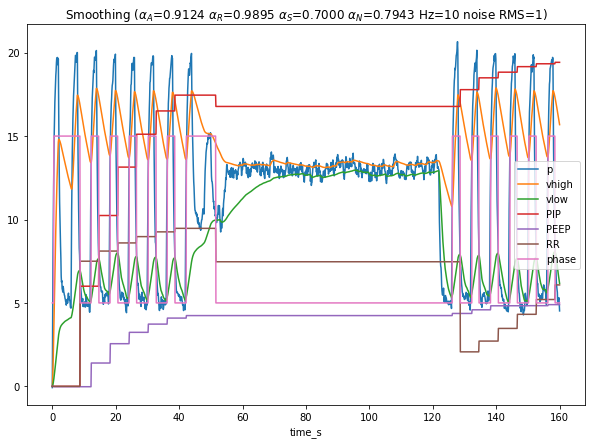

b


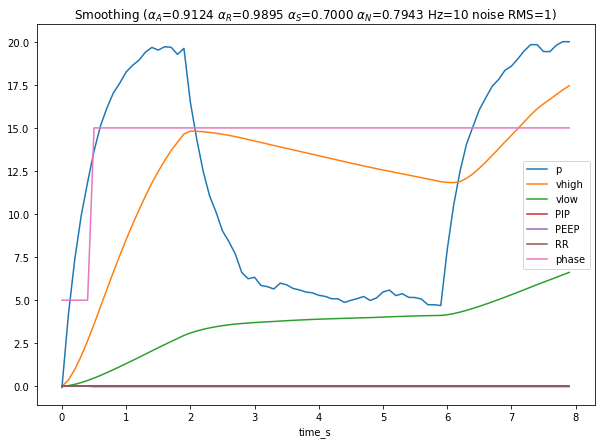

Targeting αN=0.1, αA=0.4, αR=0.97, αS=0.7,  at 10Hz - processed 1601 out of 160001 rows
a


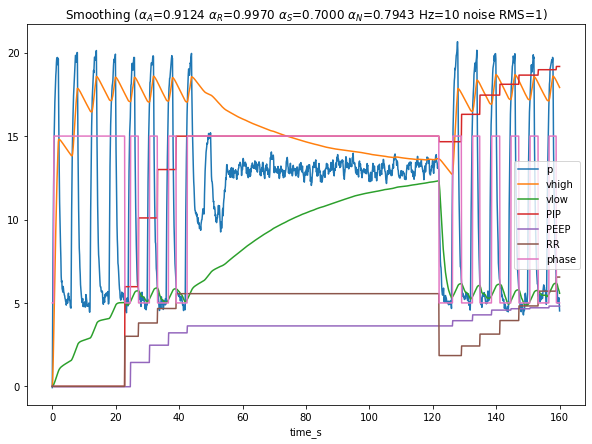

b


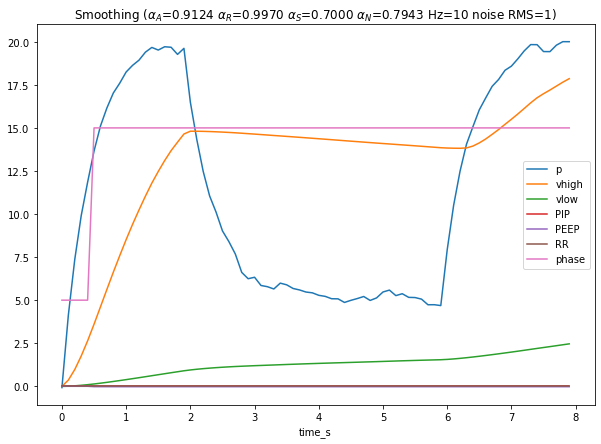

done!


In [64]:
importlib.reload(signal)

vs = signal.VentilatorStatus()
config = signal.VentilatorConfig()
alpha = "\N{greek small letter alpha}"
records_to_process = round(len(sim) / 1.5)
config.alphaS=0.7
for noise_alpha in [0.05, 0.1]: # 0.01, 0.02]: #, 0.05, 0.1]:
    for loop_frequency in [10]: #, 100]: #Hz
        for attack_alpha in [0.1, 0.2, 0.4]: #, 0.5, 0.66]:
            for release_alpha in [0.8, 0.9, 0.97]:
                config.alphaA = signal.retune_alpha(attack_alpha, loop_frequency)
                config.alphaR = signal.retune_alpha(release_alpha, loop_frequency) # was 0.997 @ 10 hz
                config.sample_frequency = loop_frequency 
                config.alphaN = signal.retune_alpha(noise_alpha, loop_frequency) # was 0.997 @ 10 hz
                results = signal.process_trace(sim.head(records_to_process), config, pressure_column='pressure_1')
                print (f"Targeting {alpha}N={noise_alpha}, {alpha}A={attack_alpha}, {alpha}R={release_alpha}, {alpha}S={config.alphaS}, "
                       f" at {loop_frequency}Hz - processed {len(results)} out of {records_to_process} rows")
                print('a')
                processed_plots(results)
                print('b')
                # first 8 seconds
                processed_plots(results.head(8 * loop_frequency))
print('done!')

In [52]:
type(round(200.0/10))

int

In [76]:
importlib.reload(signal)

for a in [0.8, 0.9, 0.95, 0.96, 0.97, 0.997]:
    for t in [10, 100]:
        print(f"retuning {a} from {t}Hz to 1Hz is {signal.retune_alpha(alpha=a, starting_frequency=t, new_frequency=1)}")
xscenarios = [
    [0.2,1],
    [0.9,10],
    [0.96,10],
    [0.9,10],
    [0.9, 100],
    [0.9895192582062144, 100],
    [signal.retune_alpha(alpha = 0.9, starting_frequency=10, new_frequency=1), 1],
]
for s in xscenarios:
    print(f'{s[0]}**{s[1]} ={s[0]**s[1]}')

retuning 0.8 from 10Hz to 1Hz is 0.10737418240000006
retuning 0.8 from 100Hz to 1Hz is 2.037035976334492e-10
retuning 0.9 from 10Hz to 1Hz is 0.3486784401
retuning 0.9 from 100Hz to 1Hz is 2.6561398887587493e-05
retuning 0.95 from 10Hz to 1Hz is 0.5987369392383786
retuning 0.95 from 100Hz to 1Hz is 0.005920529220333997
retuning 0.96 from 10Hz to 1Hz is 0.6648326359915008
retuning 0.96 from 100Hz to 1Hz is 0.016870319358849594
retuning 0.97 from 10Hz to 1Hz is 0.7374241268949281
retuning 0.97 from 100Hz to 1Hz is 0.047552507925405635
retuning 0.997 from 10Hz to 1Hz is 0.9704017769489168
retuning 0.997 from 100Hz to 1Hz is 0.7404842595397826
0.2**1 =0.2
0.9**10 =0.3486784401000001
0.96**10 =0.6648326359915008
0.9**10 =0.3486784401000001
0.9**100 =2.6561398887587544e-05
0.9895192582062144**100 =0.34867844010000193
0.3486784401**1 =0.3486784401


In [27]:
sim.head()

,time,pressure_mouth,pressure_alveolus,pressure_intrapleural,lung_volume,flow,pressure_1,pressure_2,flow_i,flow_e
0,0,0,5.0000,0.3066,3138.5224,-0.2302,1.1825,1.5128,0.0118,-0.1592
1,10,20,5.0588,0.3442,3146.0224,0.7340,19.2036,19.8522,0.7413,0.0064
2,20,20,5.1173,0.3816,3153.4930,0.7619,20.0246,19.7537,0.7517,-0.0015
3,30,20,5.1757,0.4187,3160.9344,0.7069,19.7622,21.0818,0.6324,-0.0120
4,40,20,5.2337,0.4556,3168.3465,0.6418,19.4858,18.8380,0.6642,0.0125
